# Basic Statistics Functions

Given that most of my experience with distributions and functions is in R, I want to briefly explore the important statistics functions in Python

In [2]:
# Import the important libraries
from scipy.stats import beta, binom, norm
import numpy as np
import matplotlib.pyplot as plt

## Replicating p/q/d/r Functions

In R, each distribution has functions of these forms (e.g. `dnorm`, `pnorm`). I want to briefly recreate these in Python to make sure I know what I'm doing

### Finding Cumulative Distribution Function (p-values) : `cdf` (`pnorm`)

Commonly, we want to find a p-value or something equivalent; in other words...

*Given distribution X, what proportion of density of X lies below the value supplied?*

Easy demonstration is with normal:

In [3]:
# Find the p-value at 0.5 and 1.65 for standard normal (should be exactly 0.5 and about 0.05)
# Note: the 0/1 are the standard values, I'm just specifying for funsies
norm.cdf([0, 1.65], 0, 1)

array([0.5       , 0.95052853])

As expected, half the density lies above the mean and about 0.05 lies above 1.65. If we want a p-value for a right-tailed test (x is greater than y), then we subtract these from 1.

In a 2-tailed test for normal, we have to double it (because curve is symmetrical):

In [4]:
2 * (1-norm.cdf(1.96))

0.04999579029644097

### Finding Percent Point Function: `ppf` (`qnorm`)

Another common question is something like "where does this lie in the curve?". So for instance, if I wanted to know where the p-value of 0.05 (actually 0.95) was in the normal, I'd use that:

In [5]:
norm.ppf(0.95, 0, 1)

1.6448536269514722

So I now know that when x ~ 1.65, I get a p-value of 0.05 (for a right-tailed test). If I wanted to do 2-tailed, I know I'm looking for 97.5%, so I could do that too and I should expect 1.96:

In [6]:
norm.ppf(0.975, 0, 1)

1.959963984540054

### Finding Density (or Mass): `pdf` and `pmf` (`dnorm`)

The density is kind of like the probability, but it doesn't have to sum to 1. I was distressed when I first realized this because I was confusing the 2, but the simple explanation is as follows:

* The integral over the full curve MUST add up to 1
* The value of the curve at a particular value need not be 1 (especially true in things like the beta distribution)

This mostly pops up for the continuous functions. Consider the normal distribution; for a normal centered at 0 and with standard deviation of 1 (i.e. the standard normal), what's the density at 0?

In [7]:
norm.pdf(0, 0, 1)

0.3989422804014327

To demonstrate the density weirdness, consider that we now have a super narrow range; let's do the same thing with standard deviation of 0.1:

In [8]:
norm.pdf(0, 0, 0.1)

3.989422804014327

We can also do multiple values at once (this will come in handy later), so let's compare 3 values:

In [9]:
# Make an array of 3 values and find the pdf at all of them
norm.pdf([0,1,2], 0, 1)

array([0.39894228, 0.24197072, 0.05399097])

As we'd expect in the standard normal, the farther we get from the mean, the lower the value of the pdf there. 

I'm going to use the beta function to demonstrate the relationship between the density and the probability, because it keeps me from going crazy. Also, beta is nice because it has absolute stopping points at 0 and 1. 

Assume a beta with alpha = 80 and beta = 220 (like batting average or something). What's the density at 0.3?

In [10]:
beta.pdf(0.3, 80, 220)

6.4542692423884

Again, it's much larger than 1, but that's because the curve has a super-sharp peak:

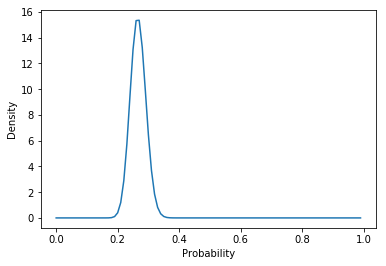

In [11]:
# Make an array of x values
x_vals = np.arange(0,1,0.01)

# Get the densities
densities = beta.pdf(x_vals, 80,220)

# Plot
plt.plot(x_vals, densities)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

We can see here what's going on, because the peak is super sharp. So if we integrate, we'll still get 1. Let's show that with some trapezoid rule:

In [12]:
# Get the median lines for each integration step
integrationMedians = (densities[1:] + densities[:-1])/2

# Get the area of each trapezoid and sum them
(integrationMedians * 0.01).sum().round(decimals=2)

1.0

Unsurprisingly, they add up to 1. So remember, the density is the value of the function at the given value, NOT the probability itself. 

We also can do it with discrete distributions, like the binomial; this requires the `pmf` function. Here, the 2nd parameter is the N, the 3rd is the K, and the first is the outcome we're looking for.

Suppose we want to know the likelihood of flipping 3 heads given 3 trials; assume the coin is fair:

In [13]:
binom.pmf(3, 3, 0.5)

0.12500000000000003

As we'd expect, it's 1/8 (because each trial is 1/2). It won't work if we specify a float:

In [14]:
binom.pmf(0.5, 3, 0.5)

0.0

In this case, these ARE probabilities; not so for the density functions. For instance, we know there's only 4 possibilities here, so let's add those:

In [15]:
binom.pmf([0,1,2,3], 3, 0.5).sum()

1.0

### Generating Random Numbers from the distribution: `rvs` (`rnorm`)

Sometimes you want to draw random variables from a distribution. So if I want like 5 random normals from the standard normal, I can do that:

In [16]:
# Pull 5 random normals; first 2 parameters are mean/std, third is size, but let's call it out by name
norm.rvs(0, 1, size = 5) 

array([-0.64931223,  0.77762195,  1.49227403, -0.17037684, -0.20824386])

Alternatively, let's pull random "batting averages":

In [17]:
# Pull 5 random batting averages from beta
beta.rvs(80,220, size = 5)

array([0.29087243, 0.26949442, 0.28455535, 0.23916345, 0.27904099])

Finally, let's simulate coin flips to see how many are heads out of 10 each time:

In [18]:
binom.rvs(10,0.5,size=5)

array([4, 4, 6, 8, 8])

## Random Sampling

For doing random sampling, the np.random.choice function pretty much does what I want. Important parameters to know:

* a: the array we're sampling from (only required parameter)
* size=None: output shape to determine how many samples to take (default is a single value)
* replace=True: sample with replacement or not
* p=None: associated probabilities (default is uniform)

In [19]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
-----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
--------
samples : single item or ndarray
    The generated random samples

Raises
-------
ValueError
    If a is an int and less than zero, if a or p are not 1-dimensional,
    if a is an array-like of siz